# Walmart Sales Prediction

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### Import CSV files

In [2]:
stores = pd.read_csv("data/stores.csv")
features = pd.read_csv("data/features.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

### Check tables

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [12]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [14]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [15]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


## Data Cleaning

### Merging Stores and Features tables with training & test data

In [16]:
train_df = pd.merge(train, stores, on=["Store"])
train = pd.merge(train_df, features, on=["Store", "Date", "IsHoliday"])
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [17]:
test_df = pd.merge(test, stores, on=["Store"])
test = pd.merge(test_df, features, on=["Store", "Date", "IsHoliday"])
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


### Replacing null values
- Fill missing CPI and Unemployment values with mean (grouped by Store and Dept).
- Fill missing MarkDown values with zeroes.

In [18]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [19]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
dtype: int64

In [20]:
test.groupby(['Store','Dept'])['Unemployment'].mean()

Store  Dept
1      1       6.509154
       2       6.509154
       3       6.509154
       4       6.509154
       5       6.509154
                 ...   
45     93      8.594923
       94      8.594923
       95      8.594923
       97      8.594923
       98      8.594923
Name: Unemployment, Length: 3169, dtype: float64

In [21]:
test['CPI'] = test.groupby(['Store','Dept'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment'] = test.groupby(['Store','Dept'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI                53
Unemployment       53
dtype: int64

In [22]:
test.loc[test['Unemployment'].isnull()].head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
10677,4,39,2013-07-12,False,A,205863,82.30,3.368,6501.43,1464.81,124.97,3809.96,3868.60,NaN,NaN
21247,8,96,2013-07-05,False,A,155078,76.18,3.422,6801.88,1592.93,880.32,5097.59,1717.64,NaN,NaN
23273,9,80,2013-05-17,False,B,125833,72.03,3.454,1198.65,25.94,0.06,292.07,6914.37,NaN,NaN
23514,9,80,2013-06-14,False,B,125833,79.43,3.431,958.94,119.77,425.36,510.55,1943.57,NaN,NaN
23819,9,80,2013-07-19,False,B,125833,75.26,3.556,1040.56,188.09,NaN,178.85,1507.30,NaN,NaN


In [23]:
# Replace with store's average CPI and Unemployment for remaining departments
test['CPI']=test.groupby(['Store'])['CPI'].transform(lambda x: x.fillna(x.mean()))
test['Unemployment'] = test.groupby(['Store'])['Unemployment'].transform(lambda x: x.fillna(x.mean()))
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Type                0
Size                0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI                 0
Unemployment        0
dtype: int64

In [24]:
# Replace MarkDown with 0 (assume none)
train['MarkDown1'] = train['MarkDown1'].fillna(0)
train['MarkDown2'] = train['MarkDown2'].fillna(0)
train['MarkDown3'] = train['MarkDown3'].fillna(0)
train['MarkDown4'] = train['MarkDown4'].fillna(0)
train['MarkDown5'] = train['MarkDown5'].fillna(0)

test['MarkDown1'] = test['MarkDown1'].fillna(0)
test['MarkDown2'] = test['MarkDown2'].fillna(0)
test['MarkDown3'] = test['MarkDown3'].fillna(0)
test['MarkDown4'] = test['MarkDown4'].fillna(0)

In [25]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [26]:
test.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

### Convert "Date" column to datetime

In [27]:
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [28]:
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

### Add Month and Week columns

In [29]:
train["Year"] = train["Date"].dt.year
train["Month"] = train["Date"].dt.month
train["Week"] = train['Date'].dt.week
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,2012,10,43


In [30]:
test["Year"] = test["Date"].dt.year
test["Month"] = test["Date"].dt.month
test["Week"] = test['Date'].dt.week
test

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,2012,11,44
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,2012,11,44
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,2012,11,44
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,2012,11,44
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573000,2012,11,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,192.870729,8.594923,2013,7,30
115060,45,94,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,192.870729,8.594923,2013,7,30
115061,45,95,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,192.870729,8.594923,2013,7,30
115062,45,97,2013-07-26,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,192.870729,8.594923,2013,7,30


## Exploratory Data Analysis

<function matplotlib.pyplot.show(*args, **kw)>

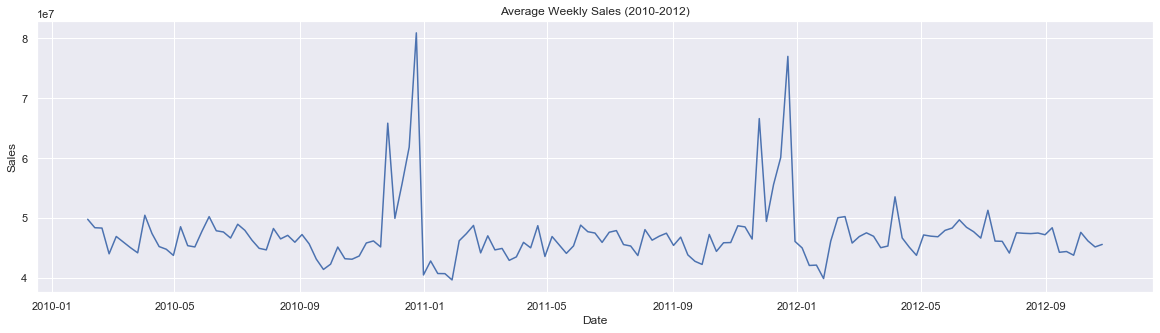

In [31]:
# Average weekly sales 
avg_weekly_sales = train.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

plt.figure(figsize=(20,5))
sns.lineplot(avg_weekly_sales.Date, avg_weekly_sales.Weekly_Sales)
plt.title('Average Weekly Sales (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show

In [32]:
avg_weekly_sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


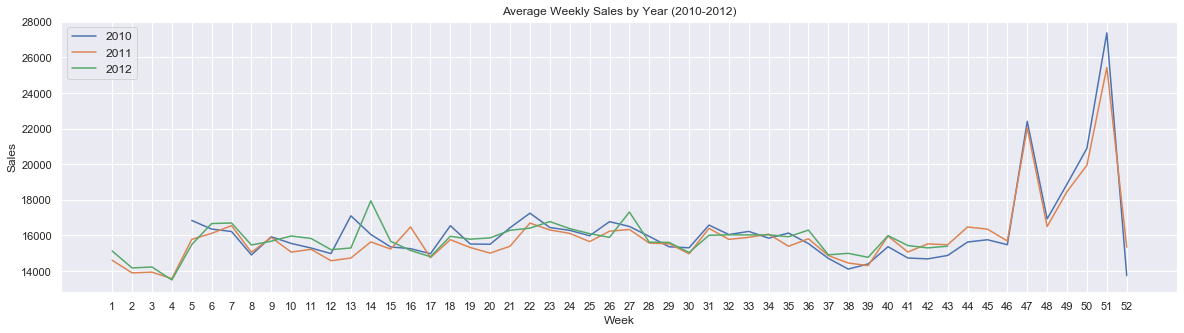

In [33]:
# Average weekly sales by year
weekly_sales_2010 = train.loc[train.Year==2010].groupby(by=['Week'], as_index=False)['Weekly_Sales'].mean()
weekly_sales_2011 = train.loc[train.Year==2011].groupby(by=['Week'], as_index=False)['Weekly_Sales'].mean()
weekly_sales_2012 = train.loc[train.Year==2012].groupby(by=['Week'], as_index=False)['Weekly_Sales'].mean()

plt.figure(figsize=(20,5))
sns.lineplot(weekly_sales_2010.Week, weekly_sales_2010.Weekly_Sales)
sns.lineplot(weekly_sales_2011.Week, weekly_sales_2011.Weekly_Sales)
sns.lineplot(weekly_sales_2012.Week, weekly_sales_2012.Weekly_Sales)
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010','2011','2012'], loc='upper left', fontsize='large')
plt.title('Average Weekly Sales by Year (2010-2012)')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.show()

**The four holidays fall within the following weeks in the dataset (not all holidays are in the data):**
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
*(Taken from Kaggle)*

- Peaks around Weeks 13(2010)/14(2012)/16(2011), Week 47, Week 51
- Easter: 2010-04-04 (Week 13), 2011-04-24 (Week 16), 2012-04-08 (Week 14), 2013-03-31 (Week 13)

**Add Easter as another holiday**

In [34]:
train.loc[(train['Week']==13) & (train['Year']==2010), "IsHoliday"] = True
train.loc[(train['Week']==16) & (train['Year']==2011), "IsHoliday"] = True
train.loc[(train['Week']==14) & (train['Year']==2012), "IsHoliday"] = True

train.loc[(train['Week']==13) & (train['Year']==2010)].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
580,1,1,2010-04-02,57258.43,True,A,151315,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.82045,7.808,2010,4,13
581,1,2,2010-04-02,47450.50,True,A,151315,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.82045,7.808,2010,4,13
582,1,3,2010-04-02,11157.08,True,A,151315,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.82045,7.808,2010,4,13
583,1,4,2010-04-02,37809.49,True,A,151315,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.82045,7.808,2010,4,13
584,1,5,2010-04-02,29967.92,True,A,151315,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.82045,7.808,2010,4,13


In [35]:
# Test contains data from 2012-11-02 to 2013-07-26
test.loc[(test['Week']==13) & (test['Year']==2013), "IsHoliday"] = True

In [36]:
test.loc[(test['Week']==13) & (test['Year']==2013)].head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
1507,1,1,2013-03-29,True,A,151315,51.0,3.606,13067.46,0.0,384.9,122.93,3903.8,225.00292,6.525,2013,3,13
1508,1,2,2013-03-29,True,A,151315,51.0,3.606,13067.46,0.0,384.9,122.93,3903.8,225.00292,6.525,2013,3,13
1509,1,3,2013-03-29,True,A,151315,51.0,3.606,13067.46,0.0,384.9,122.93,3903.8,225.00292,6.525,2013,3,13
1510,1,4,2013-03-29,True,A,151315,51.0,3.606,13067.46,0.0,384.9,122.93,3903.8,225.00292,6.525,2013,3,13
1511,1,5,2013-03-29,True,A,151315,51.0,3.606,13067.46,0.0,384.9,122.93,3903.8,225.00292,6.525,2013,3,13


**Change Week 51 to True for IsHoliday**

In [37]:
train.loc[train.Week==51, 'IsHoliday'] = True
test.loc[test.Week==51, 'IsHoliday'] = True

In [38]:
train.loc[train.Week==51].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
3300,1,1,2010-12-24,55931.23,True,A,151315,52.33,2.886,0.0,0.0,0.0,0.0,0.0,211.405122,7.838,2010,12,51
3301,1,2,2010-12-24,59889.32,True,A,151315,52.33,2.886,0.0,0.0,0.0,0.0,0.0,211.405122,7.838,2010,12,51
3302,1,3,2010-12-24,12080.36,True,A,151315,52.33,2.886,0.0,0.0,0.0,0.0,0.0,211.405122,7.838,2010,12,51
3303,1,4,2010-12-24,47893.23,True,A,151315,52.33,2.886,0.0,0.0,0.0,0.0,0.0,211.405122,7.838,2010,12,51
3304,1,5,2010-12-24,85676.09,True,A,151315,52.33,2.886,0.0,0.0,0.0,0.0,0.0,211.405122,7.838,2010,12,51


In [39]:
test.loc[test.Week==51].head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week
503,1,1,2012-12-21,True,A,151315,56.02,3.098,8231.71,0.0,274.0,358.15,2834.02,223.839845,6.573,2012,12,51
504,1,2,2012-12-21,True,A,151315,56.02,3.098,8231.71,0.0,274.0,358.15,2834.02,223.839845,6.573,2012,12,51
505,1,3,2012-12-21,True,A,151315,56.02,3.098,8231.71,0.0,274.0,358.15,2834.02,223.839845,6.573,2012,12,51
506,1,4,2012-12-21,True,A,151315,56.02,3.098,8231.71,0.0,274.0,358.15,2834.02,223.839845,6.573,2012,12,51
507,1,5,2012-12-21,True,A,151315,56.02,3.098,8231.71,0.0,274.0,358.15,2834.02,223.839845,6.573,2012,12,51


## Visualizing Correlations

In [40]:
# Drop "Date" and "Week" columns
train = train.drop('Date', axis=1)
train = train.drop('Year', axis=1)
train = train.drop('Week', axis=1)

test = test.drop('Date', axis=1)
test = test.drop('Year', axis=1)
test = test.drop('Week', axis=1)

### Encode categorical data to numbers

In [41]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [42]:
train = onehot_encode(train, 'Type', 'type')
train.head(3)

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,type_A,type_B,type_C
0,1,1,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,1,0,0
1,1,2,50605.27,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,1,0,0
2,1,3,13740.12,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,1,0,0


In [43]:
test = onehot_encode(test, 'Type', 'type')
test.head(3)

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Month,type_A,type_B,type_C
0,1,1,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,1,0,0
1,1,2,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,1,0,0
2,1,3,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,11,1,0,0


In [44]:
train = onehot_encode(train, 'Month', 'month')
train.head(3)

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,1,24924.50,False,151315,42.31,2.572,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,50605.27,False,151315,42.31,2.572,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,13740.12,False,151315,42.31,2.572,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test = onehot_encode(test, 'Month', 'month')
test.head(3)

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,type_C,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_11,month_12
0,1,1,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,0,0,0,0,1,0
1,1,2,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,0,0,0,0,1,0
2,1,3,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,0,0,0,0,0,0,0,0,1,0
